In [1]:
import torch
import torch_geometric

from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

In [2]:
import matplotlib as plt
import numpy as np
import networkx
from torch_geometric.data import Data
from sklearn.manifold import TSNE

In [23]:
from torch_geometric.utils import to_dense_adj
from torch.nn import CosineSimilarity

## Data Preparation on MUTAG

In [4]:
dataset = TUDataset(root="../dataset", name='MUTAG')

In [5]:
adj_o = to_dense_adj(dataset[2].edge_index)
adj_c = abs(to_dense_adj(dataset[2].edge_index) - 1) - torch.eye(len(dataset[2].x))

print("Original:\n", adj_o)
print("Complementary:\n", (adj_c))

Original:
 tensor([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]])
Complementary:
 tensor([[[0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
         [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 

In [6]:
def toComplementary(g):
    c = abs(to_dense_adj(g.edge_index) - 1) - torch.eye(len(g.x))
    c = c[0].nonzero().t().contiguous()
    return c

In [7]:
dataset_c = []
for graph in dataset:
    edge_c = toComplementary(graph)
    dataset_c.append(Data(edge_index=edge_c, x=graph.x, y=graph.y))

In [8]:
dataset.y

tensor([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [9]:
ys = []
for d in dataset_c:
    ys.append(d.y.item())
print(ys)

[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0]


In [10]:
# Train test split
ratio = 0.5
total = len(dataset)

# original graph
g_train = dataset[:round(ratio*total)]
g_test = dataset[round(ratio*total):]

# complementary graph
gc_train = dataset_c[:round(ratio*total)]
gc_test = dataset_c[round(ratio*total):]

In [11]:
print(f'g_train {g_train}')
print(f'g_test {g_test}')
print(f'gc_train {len(gc_train)}')
print(f'gc_test {len(gc_test)}')

g_train MUTAG(94)
g_test MUTAG(94)
gc_train 94
gc_test 94


In [12]:
print([x.y.item() for x in g_train])

[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


In [13]:
print([x.y.item() for x in gc_train])

[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


In [280]:
bs = 16
seed = 12345

g_train_loader = DataLoader(g_train, batch_size=bs, shuffle=False)
g_test_loader = DataLoader(g_test, batch_size=bs, shuffle=False)

gc_train_loader = DataLoader(gc_train, batch_size=bs, shuffle=False)
gc_test_loader = DataLoader(gc_test, batch_size=bs, shuffle=False)

In [281]:
for g in g_train_loader:
    print(g.y)
#     break

tensor([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])
tensor([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])
tensor([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])
tensor([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])


In [145]:
for g in g_test_loader:
    print(g.y)
    break

tensor([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])


In [146]:
for g in gc_train_loader:
    print(g.y)
#     break

tensor([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])
tensor([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])
tensor([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])
tensor([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])


In [147]:
for g in gc_test_loader:
    print(g.y)
    break

tensor([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])


## Building model

In [148]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear
from torch.nn import Linear
from torch_geometric.nn import global_mean_pool
from torch_geometric.nn import global_max_pool
from torch_geometric.nn import global_add_pool
import torch.nn.functional as F

In [194]:
class ComplementarySupCon(torch.nn.Module):
    def __init__(self, dataset, hidden_channels):
        super(ComplementarySupCon, self).__init__()
        
        # weight seed
        torch.manual_seed(42)
        self.conv1_o = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2_o = GCNConv(hidden_channels, hidden_channels)
        self.conv3_o = GCNConv(hidden_channels, hidden_channels)
        
        self.conv1_c = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2_c = GCNConv(hidden_channels, hidden_channels)
        self.conv3_c = GCNConv(hidden_channels, hidden_channels)
        
        # classification layer
        self.lin1 = Linear(hidden_channels, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x_o, x_c, edge_index_o, edge_index_c, batch_o, classification = False):
        x_o = self.conv1_o(x_o, edge_index_o)
        x_o = x_o.relu()
        x_o = self.conv2_o(x_o, edge_index_o)
        x_o = x_o.relu()
        x_o = self.conv3_o(x_o, edge_index_o)

        x_c = self.conv1_c(x_c, edge_index_c)
        x_c = x_c.relu()
        x_c = self.conv2_c(x_c, edge_index_c)
        x_c = x_c.relu()
        x_c = self.conv3_c(x_c, edge_index_c)


        h = (x_o + x_c) / 2
        
        h = global_add_pool(h, batch_o)
        h = self.lin1(h)
        
        if (classification):
            h.relu()
            y = F.dropout(h, p=0.5, training=self.training)
            y = self.lin2(y)
            # y.relu()
            # y = self.lin2(y)
            
            return h, y
            
        return h, x_o, x_c

In [195]:
model = ComplementarySupCon(dataset, 64)

In [196]:
model

ComplementarySupCon(
  (conv1_o): GCNConv(7, 64)
  (conv2_o): GCNConv(64, 64)
  (conv3_o): GCNConv(64, 64)
  (conv1_c): GCNConv(7, 64)
  (conv2_c): GCNConv(64, 64)
  (conv3_c): GCNConv(64, 64)
  (lin1): Linear(in_features=64, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=2, bias=True)
)

SupCon Loss

In [197]:
# Based on Khosla 2020 - Supervised contrastive learning

def supervisedContrastiveLoss(embeddings, labels, tau):
    loss = 0
    outer = 0
    inner = 0
    denom = 0
    cos = CosineSimilarity(dim=0)

    # outer
    # z_i = embeddings of graph i
    # z_i = label of graph i
    for out_index, (z_i, y_i) in enumerate(zip(embeddings, labels)):
        Pi = torch.sum(labels == y_i)
        # loss = z_i
        # loop to all positive pair with z_i and skip z_i
        for in_index, (zp_i, lp_i) in enumerate(zip(embeddings, labels)):
            if lp_i != y_i or out_index == in_index:
                continue
            # print(z_i, zp_i)
            # print(cos(z_i, zp_i))
            num = torch.exp(cos(z_i, zp_i)/tau)
            # calculate denumerator
            for _, za_i in enumerate(embeddings):
                # only take zi != za_i
                if out_index == in_index:
                    continue
                denom = denom + torch.exp(cos(z_i, za_i)/tau)
                
            inner = inner + torch.log(num/denom)
        
        outer = outer + (-1 / Pi * inner)

        # reset inner denom and inner
        denom, inner = 0, 0
        
    
    loss = outer            
    # print(loss)
    return outer, embeddings

In [198]:
# h, x_o, x_c = None, None, None
# loss = None
# y = None
# for index, (g_o, g_c) in enumerate(zip(g_train_loader, gc_train_loader)):
#     h, x_o, x_c = (model(g_o.x, g_c.x, g_o.edge_index, g_c.edge_index, g_o.batch))
#     loss, y = supervisedContrastiveLoss(h, g_o.y, 100)
#     # break

In [199]:
# torch.autograd.set_detect_anomaly(False)

In [300]:
def train(model, g_loader, gc_loader, classification = False):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
    model.train()
    classification = classification
    criterion = torch.nn.CrossEntropyLoss() if classification else None
    
    for _, (g_o, g_c) in enumerate(zip(g_loader, gc_loader)):
        if classification: # classification
            # last parameter is classification mode
            h, y = model(g_o.x, g_c.x, g_o.edge_index, g_c.edge_index, g_o.batch, True)
            # print(y.size(), g_o.y)
            loss = criterion(y, g_o.y)
            loss.backward()
        else: # pretrain model
            h, x_o, x_c = model(g_o.x, g_c.x, g_o.edge_index, g_c.edge_index, g_o.batch)
            loss, _ = supervisedContrastiveLoss(h, g_o.y, 0.2)
            loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
    if classification:
        return h, loss, y 
    else:
        return h, loss

@torch.no_grad()
def test(model, g_loader, gc_loader):
    model.eval()
    correct = 0
    for _, (g_o, g_c) in enumerate(zip(g_loader, gc_loader)):
        z, y = model(g_o.x, g_c.x, g_o.edge_index, g_c.edge_index, g_o.batch, True)
        pred = y.argmax(dim=1)
        correct += int((pred == g_o.y).sum())

    return correct/len(g_loader.dataset), z

Pretrain model

In [301]:
model = ComplementarySupCon(dataset, 64)

pretrain_losses = []

z = None
# torch.autograd.set_detect_anomaly(True)
for epoch in range(0, 50):
    h, loss = train(model, g_train_loader, gc_train_loader)
    pretrain_losses.append(loss.item())
    print(f"epoch: {epoch+1} training loss: {loss:.4f}")
    # print(f"epoch: {epoch+1} training loss: {loss:.4f}; test loss: {loss_test:.4}")
    # break


epoch: 1 training loss: 47.4665
epoch: 2 training loss: 47.4668
epoch: 3 training loss: 47.4608
epoch: 4 training loss: 47.4526
epoch: 5 training loss: 47.4417
epoch: 6 training loss: 47.4294
epoch: 7 training loss: 47.3918
epoch: 8 training loss: 47.2743
epoch: 9 training loss: 47.3903
epoch: 10 training loss: 46.9203
epoch: 11 training loss: 46.5053
epoch: 12 training loss: 47.4007
epoch: 13 training loss: 47.2973
epoch: 14 training loss: 46.7787
epoch: 15 training loss: 46.5491
epoch: 16 training loss: 47.3374
epoch: 17 training loss: 46.9253
epoch: 18 training loss: 45.5580
epoch: 19 training loss: 47.3446
epoch: 20 training loss: 46.3417
epoch: 21 training loss: 46.3845
epoch: 22 training loss: 47.2779
epoch: 23 training loss: 47.0010
epoch: 24 training loss: 47.3818
epoch: 25 training loss: 45.1116
epoch: 26 training loss: 46.7650
epoch: 27 training loss: 46.4692
epoch: 28 training loss: 46.3997
epoch: 29 training loss: 45.7223
epoch: 30 training loss: 45.0842
epoch: 31 training 

In [302]:
embeddings = [] 
labels = [] 
color_list = ['blue', 'red']

for _, (g_o, g_c) in enumerate(zip(g_train_loader, gc_train_loader)):
    h, x_o, x_c = (model(g_o.x, g_c.x, g_o.edge_index, g_c.edge_index, g_o.batch))
    for emb in h:
        # print(emb.detach().numpy())|
        embeddings.append(emb.detach().numpy())
    labels += [color_list[y-1] for y in g_o.y]

for _, (g_o, g_c) in enumerate(zip(g_test_loader, gc_test_loader)):
    h, x_o, x_c = (model(g_o.x, g_c.x, g_o.edge_index, g_c.edge_index, g_o.batch))
    for emb in h:
        # print(emb.detach().numpy())|
        embeddings.append(emb.detach().numpy())
    labels += [color_list[y-1] for y in g_o.y]

In [303]:
embeddings = np.array(embeddings)
embeddings

array([[ 1.0197142 , -0.6379214 ,  1.7902473 , ..., -1.2139672 ,
        -1.0275047 , -0.70893025],
       [ 0.46608818, -0.26094598,  1.1084774 , ..., -1.1287627 ,
        -0.55748636, -0.7436807 ],
       [ 0.46916068, -0.26256663,  1.1104692 , ..., -1.129127  ,
        -0.55799514, -0.74121344],
       ...,
       [ 0.34926605, -0.1773268 ,  0.9649823 , ..., -1.1088128 ,
        -0.45169097, -0.75308824],
       [ 1.5306677 , -0.9829331 ,  2.4164634 , ..., -1.3036174 ,
        -1.4713483 , -0.67464983],
       [ 0.8467268 , -0.51697236,  1.5688878 , ..., -1.1992679 ,
        -0.8864065 , -0.7114735 ]], dtype=float32)

In [304]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(embeddings)
# tsne.kl_divergence_

In [305]:
import plotly.express as px

In [306]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=labels)
fig.update_layout(
    title="GCN + SupCon + Complementary Graph",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

#### After Pre-training (training classifier)

freeze model parameter (just the conv layer)

In [307]:
for name, para in model.named_parameters():
    # if "conv" or "lin1" in name:
    para.requires_grad = True

In [308]:
for name, para in model.named_parameters():
    if "conv" in name:
        para.requires_grad = False
    if "lin1" in name:
        para.requires_grad = False

In [309]:
losses = []
train_accs = []
test_accs = []

for epoch in range(0, 100):
    h, loss, y = train(model, g_train_loader, gc_train_loader, classification=True)
    train_acc, z = test(model, g_train_loader, gc_train_loader)
    test_acc, z = test(model, g_test_loader, gc_test_loader)
    
    losses.append(round(loss.item(), 4))
    train_accs.append(round(train_acc, 4))
    test_accs.append(round(test_acc, 4))
    
    # print(f"epoch: {epoch+1} training loss: {loss:.4f}")
    print(f"epoch: {epoch+1} loss: {loss:.4f}; train_acc: {train_acc:.4}; test_acc: {test_acc:.4}")
    # break


epoch: 1 loss: 0.3357; train_acc: 0.7234; test_acc: 0.6064
epoch: 2 loss: 0.3856; train_acc: 0.883; test_acc: 0.7447
epoch: 3 loss: 0.1648; train_acc: 0.8617; test_acc: 0.7553
epoch: 4 loss: 0.1371; train_acc: 0.883; test_acc: 0.7979
epoch: 5 loss: 0.1872; train_acc: 0.9043; test_acc: 0.7979
epoch: 6 loss: 0.1497; train_acc: 0.883; test_acc: 0.7766
epoch: 7 loss: 0.1536; train_acc: 0.9149; test_acc: 0.7447
epoch: 8 loss: 0.0906; train_acc: 0.883; test_acc: 0.7766
epoch: 9 loss: 0.2941; train_acc: 0.9149; test_acc: 0.7447
epoch: 10 loss: 0.1423; train_acc: 0.883; test_acc: 0.7979
epoch: 11 loss: 0.2695; train_acc: 0.9149; test_acc: 0.7447
epoch: 12 loss: 0.1257; train_acc: 0.883; test_acc: 0.7979
epoch: 13 loss: 0.0603; train_acc: 0.9149; test_acc: 0.7447
epoch: 14 loss: 0.1476; train_acc: 0.9149; test_acc: 0.7447
epoch: 15 loss: 0.2703; train_acc: 0.9149; test_acc: 0.7447
epoch: 16 loss: 0.1527; train_acc: 0.8936; test_acc: 0.7979
epoch: 17 loss: 0.2697; train_acc: 0.9149; test_acc: 0.

1st Result (embeddings)

In [310]:
import matplotlib.pyplot as plt

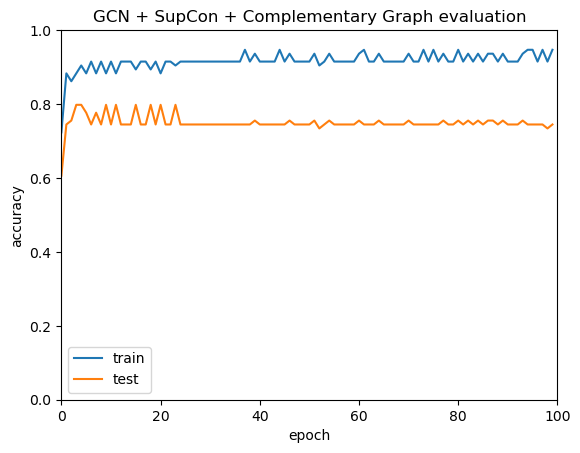

In [311]:
fig, ax = plt.subplots()
ax.plot(train_accs, label='train')
ax.plot(test_accs, label='test')
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.legend()

plt.xlim([0, 100])
plt.ylim([0, 1.0])

plt.title('GCN + SupCon + Complementary Graph evaluation')
plt.show()

In [312]:
print("average train accuracy", round(sum(train_accs)/len(train_accs), 4) * 10)
print("average test accuracy", round(sum(test_accs)/len(test_accs), 4) * 10)

average train accuracy 9.155999999999999
average test accuracy 7.497


other

In [313]:
classes = {}
for cls in dataset.y:
    if cls.item() not in classes:
        classes[cls.item()] = 1
    else:
        classes[cls.item()] = classes[cls.item()] + 1 

In [314]:
classes

{1: 125, 0: 63}

In [315]:
classes[1]/(classes[1]+classes[0])

0.6648936170212766

In [328]:
class_train = {}
for g in g_train_loader:
    for clst in g.y:
        if clst.item() not in class_train:
            class_train[clst.item()] = 1
        else:
            class_train[clst.item()] = class_train[clst.item()] + 1
        print(class_train)

{1: 1}
{1: 1, 0: 1}
{1: 1, 0: 2}
{1: 2, 0: 2}
{1: 2, 0: 3}
{1: 3, 0: 3}
{1: 3, 0: 4}
{1: 4, 0: 4}
{1: 4, 0: 5}
{1: 5, 0: 5}
{1: 6, 0: 5}
{1: 7, 0: 5}
{1: 8, 0: 5}
{1: 8, 0: 6}
{1: 9, 0: 6}
{1: 10, 0: 6}
{1: 10, 0: 7}
{1: 11, 0: 7}
{1: 11, 0: 8}
{1: 12, 0: 8}
{1: 13, 0: 8}
{1: 14, 0: 8}
{1: 15, 0: 8}
{1: 16, 0: 8}
{1: 17, 0: 8}
{1: 18, 0: 8}
{1: 19, 0: 8}
{1: 20, 0: 8}
{1: 21, 0: 8}
{1: 22, 0: 8}
{1: 23, 0: 8}
{1: 24, 0: 8}
{1: 25, 0: 8}
{1: 25, 0: 9}
{1: 26, 0: 9}
{1: 26, 0: 10}
{1: 27, 0: 10}
{1: 27, 0: 11}
{1: 27, 0: 12}
{1: 27, 0: 13}
{1: 28, 0: 13}
{1: 28, 0: 14}
{1: 29, 0: 14}
{1: 30, 0: 14}
{1: 31, 0: 14}
{1: 32, 0: 14}
{1: 33, 0: 14}
{1: 34, 0: 14}
{1: 35, 0: 14}
{1: 36, 0: 14}
{1: 37, 0: 14}
{1: 38, 0: 14}
{1: 39, 0: 14}
{1: 40, 0: 14}
{1: 40, 0: 15}
{1: 41, 0: 15}
{1: 42, 0: 15}
{1: 43, 0: 15}
{1: 44, 0: 15}
{1: 45, 0: 15}
{1: 46, 0: 15}
{1: 46, 0: 16}
{1: 47, 0: 16}
{1: 48, 0: 16}
{1: 48, 0: 17}
{1: 48, 0: 18}
{1: 49, 0: 18}
{1: 50, 0: 18}
{1: 51, 0: 18}
{1: 51, 0: 19}
{1: 52

In [329]:
class_train

{1: 68, 0: 26}

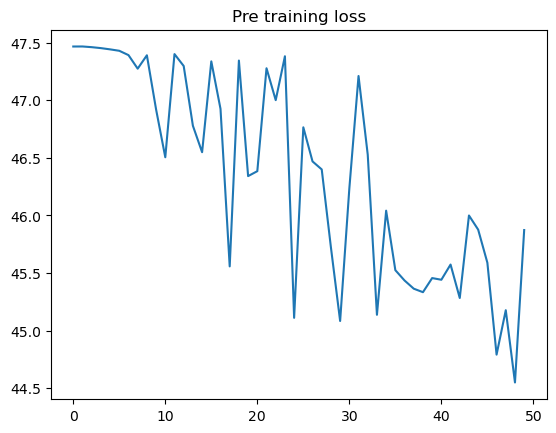

In [332]:
fig, ax = plt.subplots()
ax.plot(pretrain_losses, label="pretrain loss")
ax.set_title('Pre training loss')
plt.show()

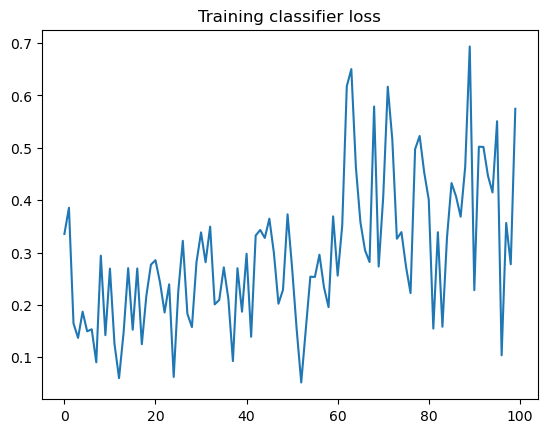

In [334]:
fig, ax = plt.subplots()
ax.plot(losses, label="Training classifier loss")
ax.set_title('Training classifier loss')
plt.show()

In [339]:
sum(test_accs)/len(test_accs)

0.7496930000000003

In [340]:
import statistics

statistics.median(test_accs)

0.7447